In [9]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

########### mflow ############
import mlflow
import mlflow.sklearn
########### mflow ############

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sharelib import *
import logging
from pathlib import Path
import json
import glob
import sys
import pickle

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

jenkinsURL = getArgs(1,"")
mlflowMinioFolder = getArgs(2,"")
mlflowTrainingFileLimit = int(getArgs(13,100))

# print(mlflowTrainingFileLimit)

In [11]:
if __name__ == "__main__":
    df = pd.DataFrame()
    path_to_json = 'rawdata6' 
    json_pattern = os.path.join(path_to_json,'*.txt')
    file_list = glob.glob(json_pattern)
    
    xcount = 0

    for file in file_list:
        xcount = xcount + 1
        print("xcount: ", xcount)
        data = pd.read_json(file, lines=True)
        df = pd.concat([df,data], ignore_index = True)
        if (xcount == mlflowTrainingFileLimit):
            break

xcount:  1
xcount:  2
xcount:  3
xcount:  4
xcount:  5
xcount:  6
xcount:  7
xcount:  8
xcount:  9
xcount:  10
xcount:  11
xcount:  12
xcount:  13
xcount:  14
xcount:  15
xcount:  16
xcount:  17
xcount:  18
xcount:  19
xcount:  20
xcount:  21
xcount:  22
xcount:  23
xcount:  24
xcount:  25
xcount:  26
xcount:  27
xcount:  28
xcount:  29
xcount:  30
xcount:  31
xcount:  32
xcount:  33
xcount:  34
xcount:  35
xcount:  36
xcount:  37
xcount:  38
xcount:  39
xcount:  40
xcount:  41
xcount:  42
xcount:  43
xcount:  44
xcount:  45
xcount:  46
xcount:  47
xcount:  48
xcount:  49
xcount:  50
xcount:  51
xcount:  52
xcount:  53
xcount:  54
xcount:  55
xcount:  56
xcount:  57
xcount:  58
xcount:  59
xcount:  60
xcount:  61
xcount:  62
xcount:  63
xcount:  64
xcount:  65
xcount:  66
xcount:  67
xcount:  68
xcount:  69
xcount:  70
xcount:  71
xcount:  72
xcount:  73
xcount:  74
xcount:  75
xcount:  76
xcount:  77
xcount:  78
xcount:  79
xcount:  80
xcount:  81
xcount:  82
xcount:  83
xcount:  84
x

In [12]:
    np.set_printoptions(threshold=sys.maxsize)
    
    df_categories = pd.concat([df["ads_ts_hh"]], axis=1, sort=False,)
    print("-------------- Count Record --------------")
    print(df_categories.shape[0])
    print("-------------- Count Record --------------")
    print("-------------- Count HH --------------")
    print(df_categories.value_counts().to_string())
    print("-------------- Count HH --------------")

    X = df_categories
    print("-------------- X --------------")
    print(X.value_counts().to_string())
    print("-------------- X --------------")


-------------- Count Record --------------
15803
-------------- Count Record --------------
-------------- Count HH --------------
ads_ts_hh
8            2942
9            2828
11           1999
13           1470
14           1179
10           1090
15            857
16            664
12            663
6             565
7             284
17            244
21            206
18            169
20            156
5              96
19             87
22             59
2              57
23             54
4              43
3              42
0              26
1              23
-------------- Count HH --------------
-------------- X --------------
ads_ts_hh
8            2942
9            2828
11           1999
13           1470
14           1179
10           1090
15            857
16            664
12            663
6             565
7             284
17            244
21            206
18            169
20            156
5              96
19             87
22             59
2              57
23  

In [13]:
# Call and fit the Local Outlier Factor detector
setNNeighbors = int((df_categories.shape[0]/50))
print("set n_neighbors : " , setNNeighbors)
lof_detector = LocalOutlierFactor(n_neighbors=setNNeighbors, contamination=0.1,novelty=True).fit(X.values)

print("-------------- Model Size (MB) --------------")
print("{:.2f}".format(sys.getsizeof(pickle.dumps(lof_detector))/(1024*1024)))
print("-------------- Model Size (MB) --------------")

lof_detect = lof_detector.predict(X)

recordDetect,countDetect = np.unique(lof_detect, return_counts=True)
print("--------------Count Anomaly VS Normal-------------")
print(recordDetect)
print(countDetect)

if (len(countDetect) == 1):
    row_to_be_added = countDetect
    countDetect = np.append(np.array([0]),row_to_be_added,axis=0)

print("Anomaly = " , countDetect[0] , "record with " , (countDetect[0])*100/(countDetect[0]+countDetect[1]) ," %")
print("Normal  = " , countDetect[1] , "record with " , (countDetect[1])*100/(countDetect[0]+countDetect[1]) ," %")
print("--------------Count Anomaly VS Normal-------------")
# print(lof_detect)

print("-------------- List HH with Prediction -------------")
for index, value in df_categories.value_counts().items():
    tempdf = pd.DataFrame([
        [index[0]]
    ], columns=['ads_ts_hh'])
    predictData = lof_detector.predict(tempdf)
    print(index[0]  , " | count ="  , value , " | result =" , dataPredictionToString(predictData[0]))

print("-------------- List HH with Prediction -------------")

set n_neighbors :  316
-------------- Model Size (MB) --------------
38.75
-------------- Model Size (MB) --------------
--------------Count Anomaly VS Normal-------------
[-1  1]
[  928 14875]
Anomaly =  928 record with  5.872302727330254  %
Normal  =  14875 record with  94.12769727266975  %
--------------Count Anomaly VS Normal-------------
-------------- List HH with Prediction -------------
8  | count = 2942  | result = Normally
9  | count = 2828  | result = Normally
11  | count = 1999  | result = Normally
13  | count = 1470  | result = Normally
14  | count = 1179  | result = Normally
10  | count = 1090  | result = Normally
15  | count = 857  | result = Normally
16  | count = 664  | result = Normally
12  | count = 663  | result = Normally
6  | count = 565  | result = Normally
7  | count = 284  | result = Anomaly
17  | count = 244  | result = Anomaly
21  | count = 206  | result = Normally
18  | count = 169  | result = Normally
20  | count = 156  | result = Normally
5  | count = 96  

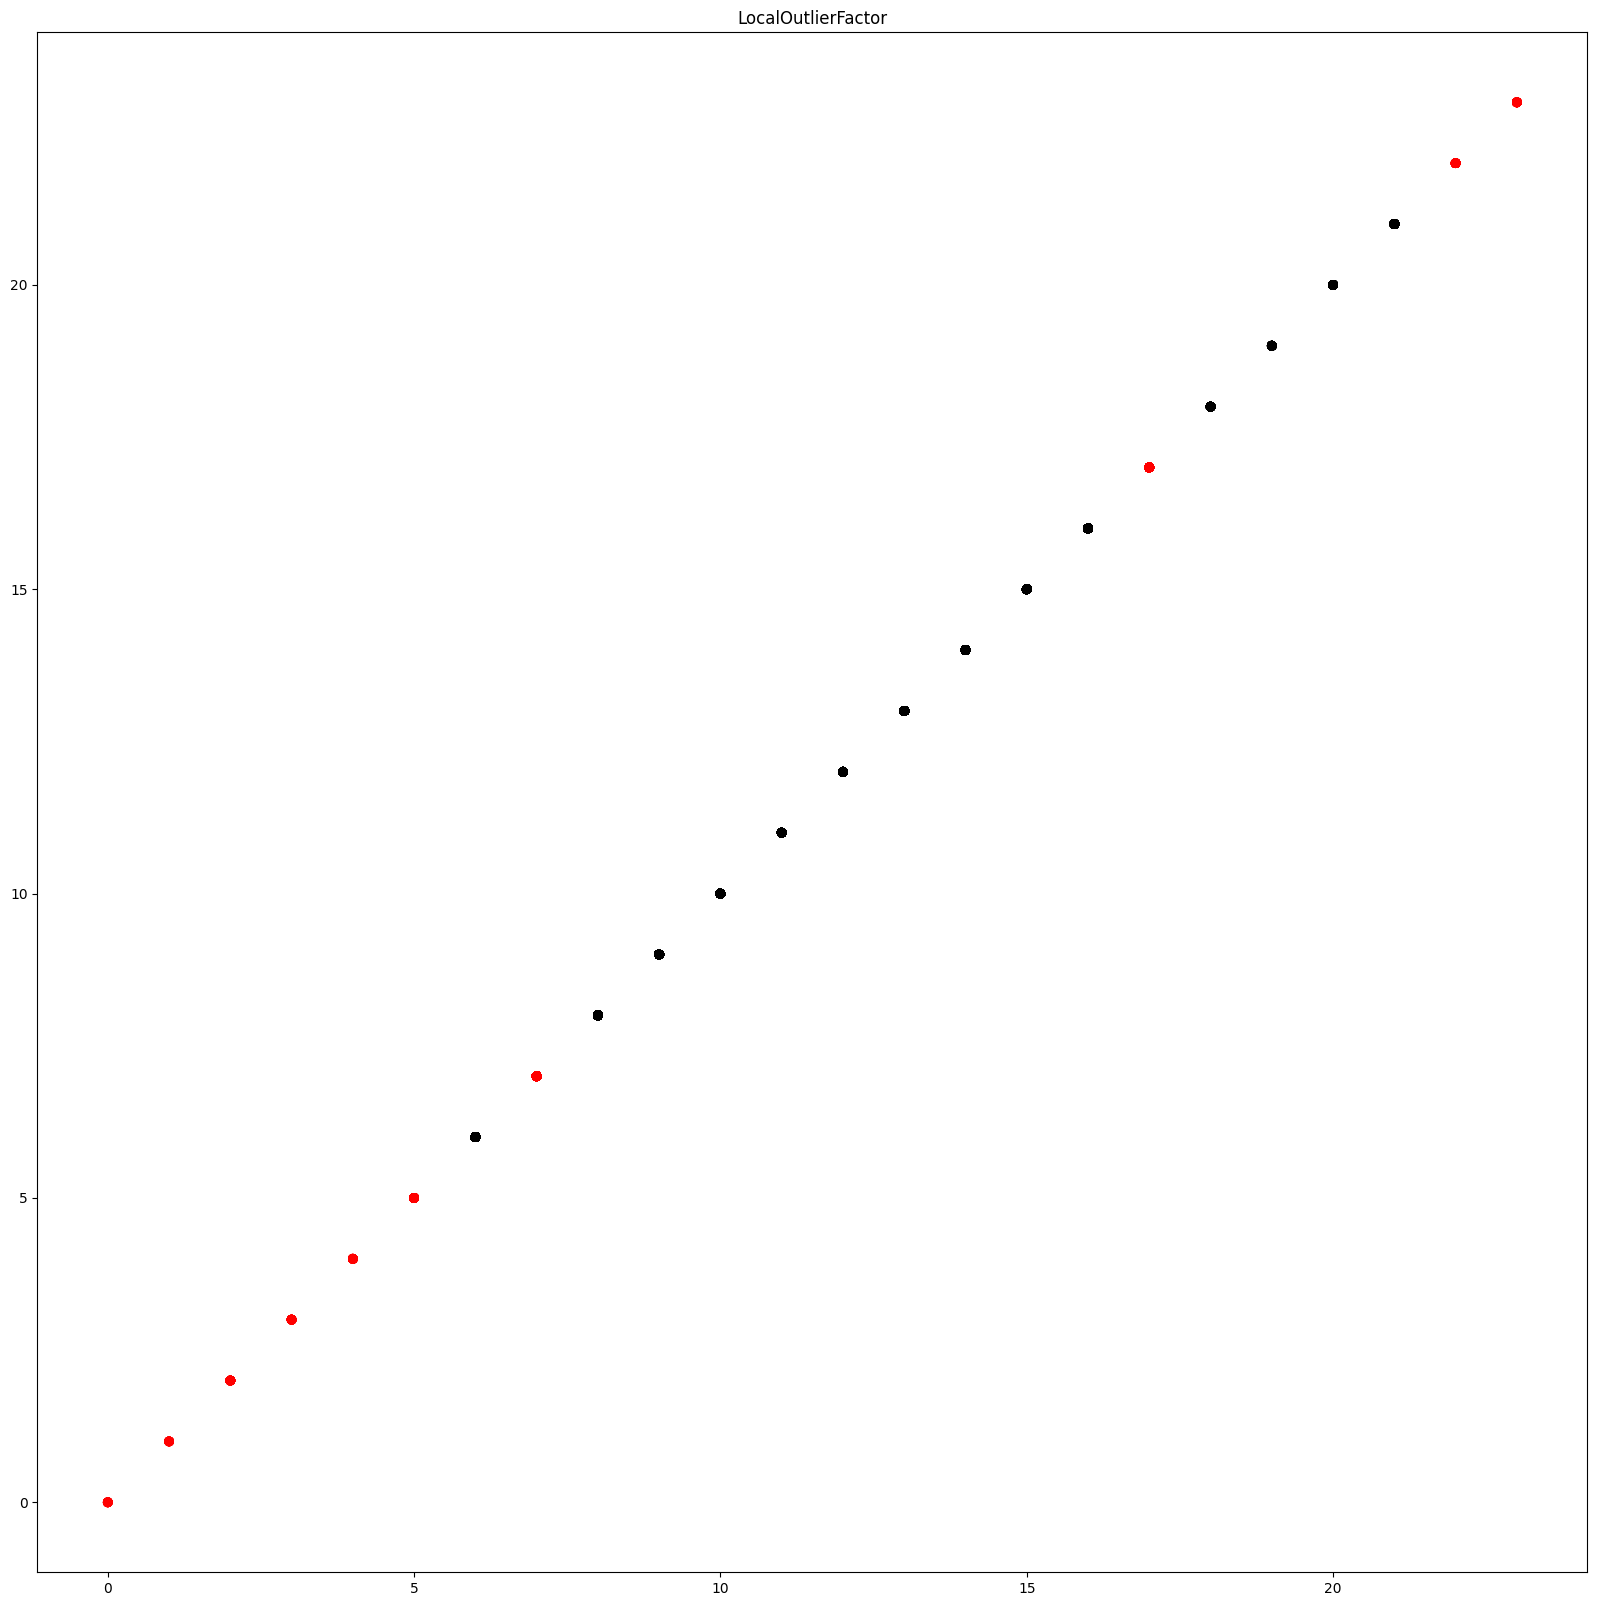

In [14]:
plt.figure(figsize=(20,20))
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 0], c=lof_detect, cmap="flag", alpha=0.5)
plt.title("LocalOutlierFactor")
plt.show()

In [15]:
%set_env MLFLOW_TRACKING_URI=http://127.0.0.1:5000
# %set_env MLFLOW_TRACKING_URI=http://mlflow.rtarf-ml.its-software-services.com/
tracking_uri = os.environ["MLFLOW_TRACKING_URI"]
# export MLFLOW_TRACKING_USERNAME=user 
# export MLFLOW_TRACKING_PASSWORD=pwd

experiment = mlflow.set_experiment(experiment_name='ads-anomaly-time')
experiment_id = experiment.experiment_id

run_description = f"""
### Note
**All information** * about Training * ~~ML here~~ .
Jenkins URL: [{jenkinsURL}]({jenkinsURL})
"""

with mlflow.start_run(experiment_id=experiment_id,description=run_description):
    mlflow.set_tracking_uri(tracking_uri)
    
    print("Artifact Location: {}".format(experiment.artifact_location))
    print("artifact uri : " + mlflow.get_artifact_uri())

    mlflow.doctor()
    mlflow.log_param("MlflowMinioFolder", mlflowMinioFolder)
    mlflow.log_param("SampleFile", xcount)
    mlflow.log_param("SampleRows", X.shape[0])
    # mlflow.set_tag("JenkinsURL",jenkinsURL)

    mlflow.log_metric("Anomaly", str((countDetect[0])*100/(countDetect[0]+countDetect[1])))
    mlflow.log_metric("Normal", str((countDetect[1])*100/(countDetect[0]+countDetect[1])))
    mlflow.sklearn.log_model(lof_detector, "model", registered_model_name="ads-anomaly-by-time")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

env: MLFLOW_TRACKING_URI=http://127.0.0.1:5000
Artifact Location: mlflow-artifacts:/867019726828514942
artifact uri : mlflow-artifacts:/867019726828514942/eb1fbf130cea45bc9ba8beab7f1cdb24/artifacts
System information: Windows 10.0.19045
Python version: 3.9.7
MLflow version: 2.1.1
MLflow module location: C:\Users\sutee.k\AppData\Roaming\Python\Python39\site-packages\mlflow\__init__.py
Tracking URI: http://127.0.0.1:5000
Registry URI: http://127.0.0.1:5000
Active experiment ID: 867019726828514942
Active run ID: eb1fbf130cea45bc9ba8beab7f1cdb24
Active run artifact URI: mlflow-artifacts:/867019726828514942/eb1fbf130cea45bc9ba8beab7f1cdb24/artifacts
MLflow environment variables: 
  MLFLOW_TRACKING_URI: http://127.0.0.1:5000
MLflow dependencies: 
  Flask: 2.3.3
  Jinja2: 3.1.2
  alembic: 1.12.0
  click: 8.1.7
  cloudpickle: 2.2.1
  databricks-cli: 0.17.8
  docker: 6.1.3
  entrypoints: 0.4
  gitpython: 3.1.37
  importlib-metadata: 5.2.0
  markdown: 3.4.4
  matplotlib: 3.8.0
  numpy: 1.25.2
  

Successfully registered model 'ads-anomaly-by-time'.
2023/11/11 20:28:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: ads-anomaly-by-time, version 1


Model saved in run eb1fbf130cea45bc9ba8beab7f1cdb24


Created version '1' of model 'ads-anomaly-by-time'.


In [16]:
!mlflow models serve -m mlflow-artifacts:/867019726828514942/eb1fbf130cea45bc9ba8beab7f1cdb24/artifacts/model -p 1235 --no-conda

^C


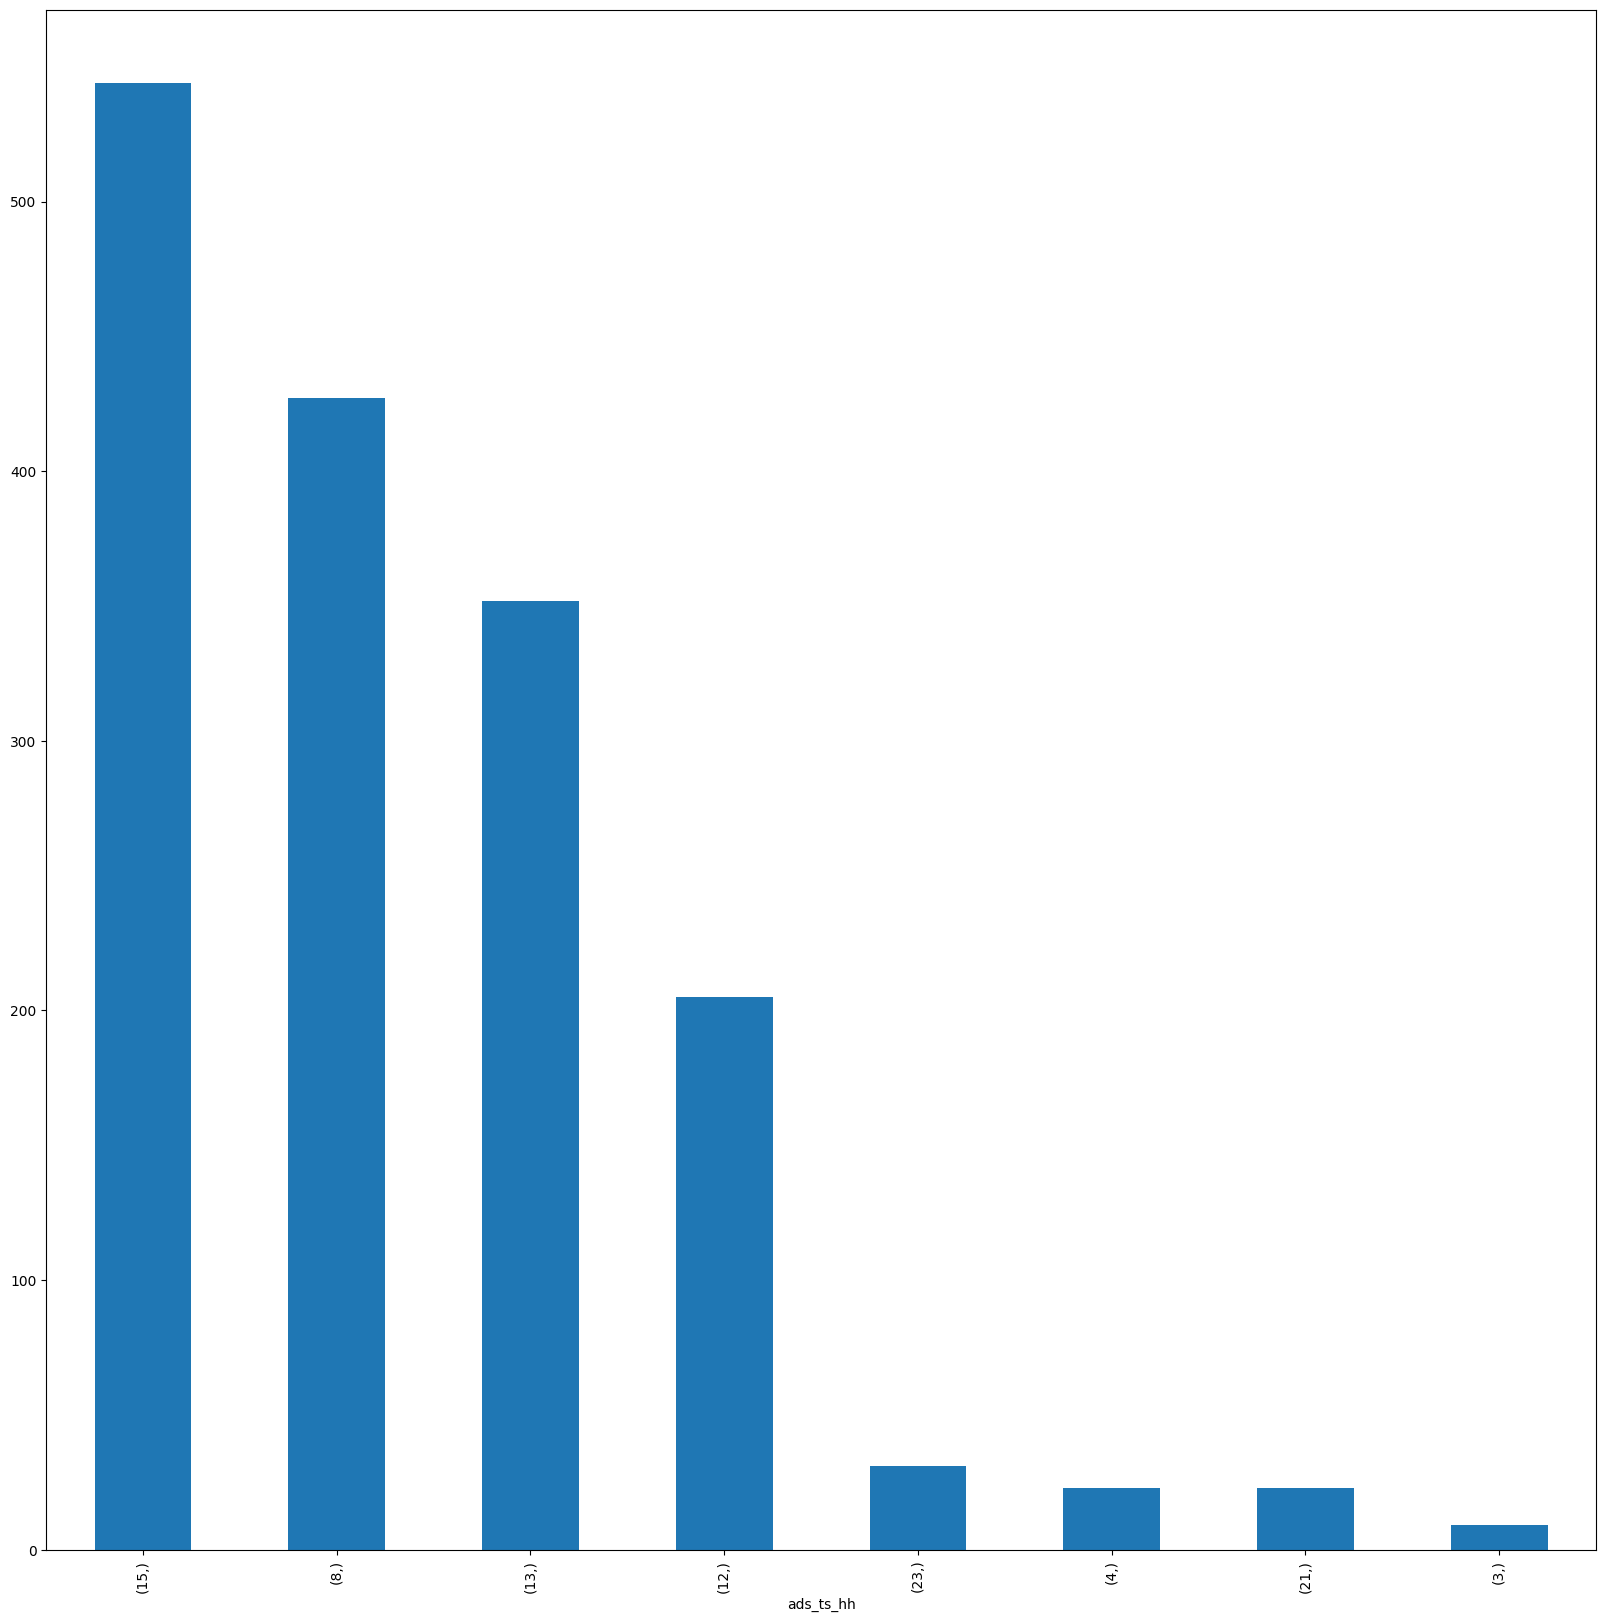

In [157]:
# Plot the conparison between actual and predicted y
df_categories.value_counts()[: :].plot(kind="bar", figsize=(20,20))
plt.show()